# Bayesian linear regression in 1 dimension with known $\sigma^2$

Consider fitting a model of the form

\begin{equation}
y \mid x, \theta \sim \mathcal{N}\left(w_0 + w_1x, \sigma^2\right).
\end{equation}

We are given the data below.

{'slope': 0.042651413189771205, 'intercept': -3.2564284840327913, 'variance': 0.01388832853186212}


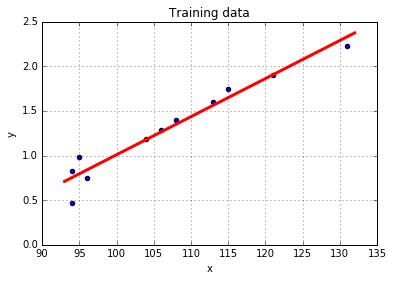

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from linreg import *

X = np.array([94,96,94,95,104,106,108,113,115,121,131], dtype=np.float64)
Y = np.array([0.47,0.75,0.83,0.98,1.18,1.29,1.40,1.60,1.75,1.90,2.23])
N = len(X)

linreg = SimpleOnlineLinearRegressor()
linreg.fit(X, Y)
print(linreg.get_params())

plot_xy(X, Y)
plot_abline(linreg.get_params()['slope'], linreg.get_params()['intercept'], 
            np.min(X) - 1, np.max(X) + 1)
plt.show()

Part (a) asks us to compute an unbiased estimate of $\sigma^2$, which is

\begin{equation}
\hat{\sigma}^2 = \frac{1}{N - 2}\sum_{i=1}^N\left(y_i - \hat{y}_i\right)^2.
\end{equation}

In [2]:
Y_hat = linreg.predict(X)
sigma2_hat = np.dot(Y - Y_hat, Y - Y_hat)/(N-2)
print(sigma2_hat)

0.0169746237612


We find that $\boxed{\hat{\sigma}^2 \approx 0.0169746237612.}$ Now, for part (b), we put a prior on $(w_0,w_1)$, where $p(w_0, w_1) = p(w_0)p(w_1)$ such that $p(w_0) \propto 1$ and $w_1 \sim \mathcal{N}(0,1)$. We can write this as 

\begin{equation}
\mathbf{w} = \begin{pmatrix}w_0 \\ w_1 \end{pmatrix} 
\sim \mathcal{N}\left(\mathbf{w}_0, \mathbf{V}_0\right),
~\text{where}~\mathbf{w}_0 = \begin{pmatrix} 0 \\ 0 \end{pmatrix}
~\text{and}~\mathbf{V}_0 = \begin{pmatrix}\sigma_0 & 0 \\ 0 & 1\end{pmatrix},
\end{equation}

where we let $\sigma_0 \rightarrow \infty$. 

Part (c) asks us to compute the marginal posterior for the slope $p\left(w_1 \mid \mathcal{D}, \sigma^2\right)$, where we let $\sigma^2 = \hat{\sigma}^2$ computed above. First, by section section 7.6.1 in the textbook, the joint posterior has distrbution

\begin{align}
\mathbf{w} &\mid \mathcal{D}, \sigma^2 \sim \mathcal{N}\left(\mathbf{w}_N, \mathbf{V}_N\right) \\
\mathbf{V}_N &= \sigma^2\left(\sigma^2\mathbf{V}_0 + \mathbf{X}^\intercal\mathbf{X}\right)^{-1} \\
&= \frac{\sigma^2}{\sigma^2 + \sum_{i=1}^N x_i^2 - N\bar{x}^2}
\begin{pmatrix}
\frac{\sigma^2}{N} + \frac{1}{N}\sum_{i=1}^N x_i^2 & -\bar{x} \\
-\bar{x} & 1
\end{pmatrix}. \\
\mathbf{w}_N &= \mathbf{V}_N\mathbf{V}_0^{-1}\mathbf{w}_0 + \frac{1}{\sigma^2}\mathbf{V}_N\mathbf{X}^\intercal \mathbf{y} \\
&= \left(\frac{\sigma^2}{N} + \frac{1}{N}\sum_{i=1}^N x_i^2 - \bar{x}^2\right)^{-1}
\begin{pmatrix}
\left(\frac{\sigma^2}{N} + \frac{1}{N}\sum_{i=1}^N x_i^2\right)\bar{y} - \frac{\bar{x}}{N}\sum_{i=1}^N x_iy_i \\
\frac{1}{N}\sum_{i=1}^N x_iy_i - \bar{x}\bar{y}
\end{pmatrix}\\
&= \left(\frac{\sigma^2}{N} + \frac{1}{N}\sum_{i=1}^N x_i^2 - \bar{x}^2\right)^{-1}
\begin{pmatrix}
\left(\frac{\sigma^2}{N} + \frac{1}{N}\sum_{i=1}^N x_i^2 - \bar{x}^2\right)\bar{y} - \bar{x}\left(\frac{1}{N}\sum_{i=1}^N x_iy_i - \bar{x}\bar{y}\right) \\
\frac{1}{N}\sum_{i=1}^N x_iy_i - \bar{x}\bar{y}
\end{pmatrix}.
\end{align}

Thus, the marginal distribution for $w_1$ is

\begin{equation}
w_1 \mid \mathcal{D}, \sigma^2 \sim \mathcal{N}\left(\left(\frac{\sigma^2}{N} + \frac{1}{N}\sum_{i=1}^N x_i^2 - \bar{x}^2\right)^{-1}\left(\frac{1}{N}\sum_{i=1}^N x_iy_i - \bar{x}\bar{y}\right),
\frac{\sigma^2}{\sigma^2 + \sum_{i=1}^N x_i^2 - N\bar{x}^2}
\right).
\end{equation}

Let us calculate these values numerically.

In [3]:
w1_var = sigma2_hat/(sigma2_hat + np.dot(X, X) - N*np.mean(X)**2)
w1_mean = (np.dot(X,Y) - N*np.mean(X)*np.mean(Y))/(sigma2_hat + np.dot(X, X) - N*np.mean(X)**2)
print(w1_mean)
print(w1_var)

0.0426509259869
1.14229003107e-05


So we have that

\begin{align}
\mathbb{E}\left[w_1 \mid \mathcal{D}, \sigma^2\right] &\approx 0.0426509259869 \\
\operatorname{Var}\left[w_1 \mid \mathcal{D}, \sigma^2\right] &\approx 1.14229003107 \times 10^{-5}.
\end{align}

Finally part (d) asks us to compute the 95% credible interval, which is
\begin{equation}
\left[\mathbb{E}\left[w_1 \mid \mathcal{D}, \sigma^2\right] - \Phi^{-1}(0.975)\sqrt{\operatorname{Var}\left[w_1 \mid \mathcal{D}, \sigma^2\right]},
\mathbb{E}\left[w_1 \mid \mathcal{D}, \sigma^2\right] + \Phi^{-1}(0.975)\sqrt{\operatorname{Var}\left[w_1 \mid \mathcal{D}, \sigma^2\right]}\right].
\end{equation}

Let's calculate this.

In [4]:
print(w1_mean - stats.norm.ppf(0.975)*np.sqrt(w1_var))
print(w1_mean + stats.norm.ppf(0.975)*np.sqrt(w1_var))

0.0360266825466
0.0492751694272


So, we have that

\begin{equation} 
p(0.0360266825466 \leq w_1 \leq 0.0492751694272) \approx 0.95.
\end{equation}